In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [485]:
path = r'C:\Users\alyss\Documents\Video Games Sales Prediction\Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(path)

In [486]:
df.head()
# df.head(x) returns first x rows (default x = 5)
# df.tail(x) returns last x rows (default x = 5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
df.dtypes
# returns data type for each column

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [488]:
df.describe()
# returns basic stats on all columns (defaults to numerical columns)
# dataframe contains NULL values since COUNT ≠ rows

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [489]:
df.isnull()
# returns t/f values for each element

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [490]:
df.isnull().sum()
# returns the sum for each column

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [491]:
df = df.dropna()
# drops all rows containing NULL values

In [492]:
df[['Genre']].describe()
# df[' '] returns a series
# df[[' ']] returns a dataframe

,Genre
count,6825
unique,12
top,Action
freq,1630


#### plot

In [545]:
plot_df = df.groupby('Genre')[['Genre', 'Global_Sales']].agg({'Genre':'count', 
                                                              'Global_Sales':'sum'}) # agg({key:value})
plot_df.columns = ['Titles', 'Global_Sales'] # renames columns in plot_df
plot_df = plot_df.sort_values('Global_Sales') #sorts columns in plot_df by Global_Sales

,Titles,Global_Sales
Genre,,
Strategy,267,69.61
Puzzle,118,78.90
Adventure,248,80.75
Simulation,297,202.70
Fighting,378,249.95
Platform,403,377.80
Misc,384,416.26
Racing,581,476.22
Role-Playing,712,501.37


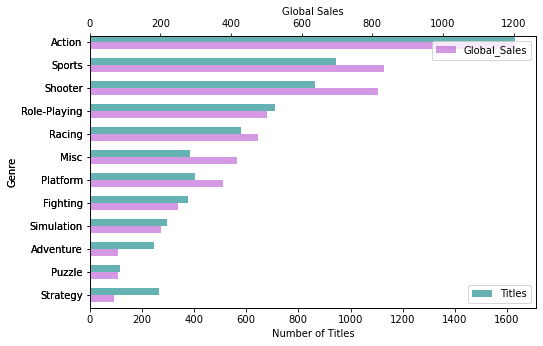

In [494]:
fig, ax = plt.subplots(figsize = (8, 5)) # creates a figure to map onto
ax2 = ax.twiny() # creates another axes that shares the same x-values as ax
width = 0.3

plot_df.Titles.plot(kind = 'barh', color = 'teal', alpha = 0.6, 
                    ax = ax, width = width, position = 0); #x deaults to index
plot_df.Global_Sales.plot(kind = 'barh', color = 'mediumorchid', alpha = 0.6, 
                          ax = ax2, width = width, position = 1);

ax.legend(loc=0);
ax2.legend(loc=1);
ax.set_xlabel('Number of Titles');
ax2.set_xlabel('Global Sales');

#### examining correlations

In [495]:
df.corr() #returns correlations for all columns

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,-0.253914,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.085796,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.055915,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.127521,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.057083,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.088349,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.580318,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.195087,0.365603
User_Score,-0.253914,0.085796,0.055915,0.127521,0.057083,0.088349,0.580318,0.195087,1.000000,0.017546
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,0.017546,1.000000


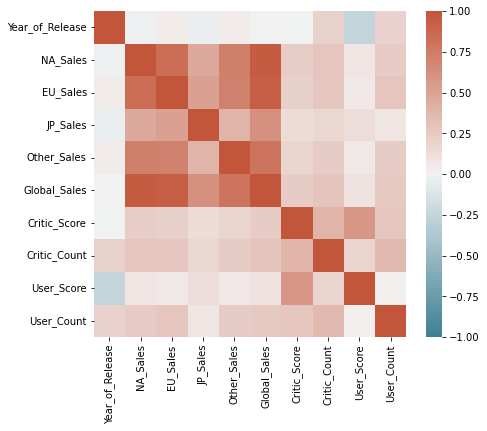

In [496]:
plt.figure(figsize = (7, 6))
cmap = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(df.corr(), cmap = cmap, vmin = -1, vmax = 1);

#### prediction model

In [497]:
x = df[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
y = df['Global_Sales']

In [498]:
from sklearn.model_selection import train_test_split
# function that reserves x% of the data to train the model, and (1 - x)% to test the model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [499]:
from sklearn.linear_model import LinearRegression
# ordinary least squares linear regression class

model = LinearRegression() # initializes a linear regression model object
model.fit(xtrain, ytrain) # fits data to model above and estimates coefficients
ypred = model.predict(xtest) # calculates y values based on model equation

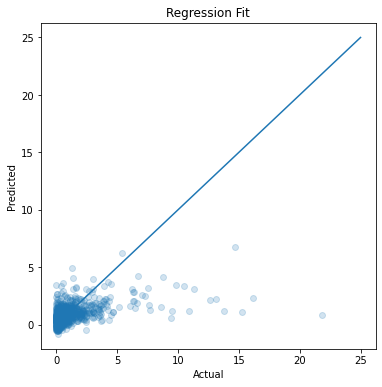

In [500]:
limx = [0, 25]
limy = [0, 25]

fig, ax = plt.subplots(figsize = (6, 6));
ax.plot(limx, limy);
ax.scatter(ytest, ypred, alpha = 0.2);
ax.set_title('Regression Fit')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

In [501]:
import sklearn.metrics as metrics

r2 = metrics.r2_score(ytest, ypred)
r2

0.2245299214012374

#### imrpoving model with platform

In [502]:
platform = df.groupby('Platform')[['Platform', 'Global_Sales']].agg({'Platform':'count', 
                                                                     'Global_Sales':'sum'})
platform.sort_values('Global_Sales', ascending = False)

,Platform,Global_Sales
Platform,,
PS2,1140,945.97
X360,858,853.30
PS3,769,784.30
Wii,479,658.98
DS,464,382.33
PS4,239,243.03
XB,565,212.07
PS,150,206.55
PSP,390,187.92


In [503]:
# categorizes the different platforms as dummy variables
playstation = ['PS2', 'PS3', 'PS4', 'PS']
wii = ['Wii', 'WiiU']
xbox = ['X360', 'XB', 'XOne']
handheld = ['DS', 'PSP', 'GBA', '3DS', 'PSV']
pc = ['PC']
old = ['GC', 'DC']

In [504]:
# runs through list and returns 1 (true) or 0 (false), and creates a column with these values within the df
df['Playstation'] = df['Platform'].isin(playstation).astype('int')
df['Wii'] = df['Platform'].isin(wii).astype('int')
df['Xbox'] = df['Platform'].isin(xbox).astype('int')
df['Handheld'] = df['Platform'].isin(handheld).astype('int')
df['PC'] = df['Platform'].isin(pc).astype('int')
df['Old'] = df['Platform'].isin(old).astype('int')

In [505]:
# adds a column to df which represents the year of release in relation to the earliest date
df['Year'] = df['Year_of_Release'] - df['Year_of_Release'].min()

In [506]:
x = df[['Year', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
        'Playstation', 'Wii', 'Xbox', 'Handheld', 'PC', 'Old']]
y = df['Global_Sales']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(xtrain, ytrain) 
ypred = model.predict(xtest) 

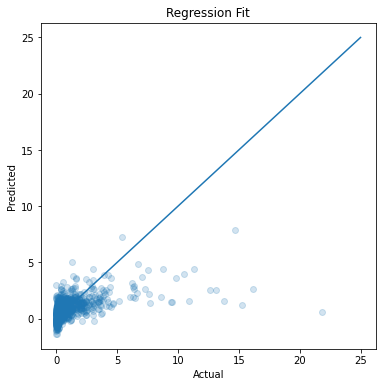

In [507]:
limx = [0, 25]
limy = [0, 25]

fig, ax = plt.subplots(figsize = (6, 6));
ax.plot(limx, limy);
ax.scatter(ytest, ypred, alpha = 0.2);
ax.set_title('Regression Fit')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

In [508]:
r2 = metrics.r2_score(ytest, ypred)
r2

0.26750025998513194

#### improving model with genre

In [546]:
# categorizes the different genres as dummy variables
strategy = ['Strategy']
puzzle = ['Puzzle']
adventure = ['Adventure']
simulation = ['Simulation']
fighting = ['Fighting']
platform = ['Platform']
misc = ['Misc']
racing = ['Racing']
rpg = ['Role-Playing']
shooter = ['Shooter']
sports = ['Sports']
action = ['Action']

In [547]:
# runs through list and returns 1 (true) or 0 (false), and creates a column with these values within the df
df['Strategy'] = df['Genre'].isin(strategy).astype('int')
df['Puzzle'] = df['Genre'].isin(puzzle).astype('int')
df['Adventure'] = df['Genre'].isin(adventure).astype('int')
df['Simulation'] = df['Genre'].isin(simulation).astype('int')
df['Fighting'] = df['Genre'].isin(fighting).astype('int')
df['Platform'] = df['Genre'].isin(platform).astype('int')
df['Misc'] = df['Genre'].isin(misc).astype('int')
df['Racing'] = df['Genre'].isin(racing).astype('int')
df['RPG'] = df['Genre'].isin(rpg).astype('int')
df['Shooter'] = df['Genre'].isin(shooter).astype('int')
df['Sports'] = df['Genre'].isin(sports).astype('int')
df['Action'] = df['Genre'].isin(action).astype('int')

In [548]:
x = df[['Year', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
        'Playstation', 'Wii', 'Xbox', 'Handheld', 'PC', 'Old', 
        'Puzzle', 'Adventure', 'Simulation', 'Fighting', 'Platform', 'Misc', 'Racing', 'RPG', 
        'Shooter', 'Sports', 'Action']]
y = df['Global_Sales']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(xtrain, ytrain) 
ypred = model.predict(xtest) 

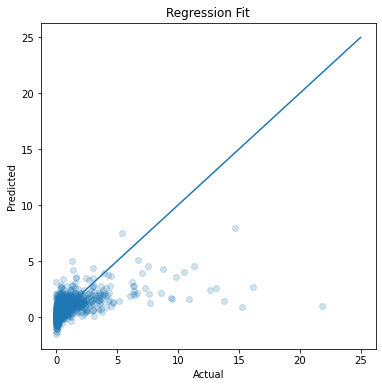

In [549]:
limx = [0, 25]
limy = [0, 25]

fig, ax = plt.subplots(figsize = (6, 6));
ax.plot(limx, limy);
ax.scatter(ytest, ypred, alpha = 0.2);
ax.set_title('Regression Fit')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

In [550]:
r2 = metrics.r2_score(ytest, ypred)
r2

0.26798386643979444

#### verifying signifigance of each variable

In [509]:
import statsmodels.api as sm

In [572]:
X = df[['Year', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
        'Playstation', 'Wii', 'Xbox', 'Handheld', 'PC', 'Old', 
        'Puzzle', 'Adventure', 'Simulation', 'Fighting', 'Platform', 'Misc', 'Racing', 'RPG', 
        'Shooter', 'Sports', 'Action']]
Y = df['Global_Sales'] 

mod = sm.OLS(Y, X).fit() # performs an ordinary least squares linear regression fit
mod.summary() # returns a result summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     70.19
Date:                Sun, 22 May 2022   Prob (F-statistic):          4.85e-270
Time:                        19:55:43   Log-Likelihood:                -13619.
No. Observations:                6825   AIC:                         2.728e+04
Df Residuals:                    6803   BIC:                         2.743e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Year            -0.0410      0.006     -6.980      0.000      -0.052      -0.029
Critic_Score     0.0249      0.002     11.271      0.000       0.021       0.029
Critic_Count     0.0204      0.001     14.670      0.000       0.018       0.023
User_Score      -0.0976      0.020     -4.877      0.000      -0.137      -0.058
User_Count       0.0007   4.29e-05     17.093      0.000       0.001       0.001
Playstation     -0.2178      0.225     -0.970      0.332      -0.658       0.222
Wii              0.3844      0.240      1.603      0.109      -0.086       0.855
Xbox            -0.5548      0.228     -2.438      0.015      -1.001      -0.109
Handheld        -0.2325      0.230     -1.012      0.312      -0.683       0.218
PC              -1.2637      0.233     -5.418      0.000      -1.721      -0.806
Old             -0.6378      0.235     -2.717      0.007      -1.098      -0.178
Puzzle           0.1158      0.201      0.576      0.565      -0.278       0.510
Adventure        0.0603      0.160      0.377      0.706      -0.253       0.374
Simulation       0.4993      0.151      3.302      0.001       0.203       0.796
Fighting         0.2006      0.147      1.369      0.171      -0.087       0.488
Platform         0.4211      0.145      2.911      0.004       0.138       0.705
Misc             0.6788      0.147      4.620      0.000       0.391       0.967
Racing           0.4591      0.135      3.398      0.001       0.194       0.724
RPG              0.0289      0.131      0.220      0.826      -0.228       0.286
Shooter          0.2368      0.128      1.850      0.064      -0.014       0.488
Sports           0.4512      0.129      3.494      0.000       0.198       0.704
Action           0.2817      0.122      2.312      0.021       0.043       0.521
==============================================================================
Omnibus:                    14653.167   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127758665.959
Skew:                          18.667   Prob(JB):                         0.00
Kurtosis:                     672.229   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [571]:
# removing statistically insignifigant variables (P>|t| < 0.05) 
X = df[['Year', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
        'Wii', 'Xbox', 'PC', 'Old', 'Simulation', 'Platform', 
        'Misc', 'Racing', 
        'Shooter', 'Sports', 'Action']]
Y = df['Global_Sales'] 

mod = sm.OLS(Y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.289
Model:                            OLS   Adj. R-squared (uncentered):              0.288
Method:                 Least Squares   F-statistic:                              173.1
Date:                Sun, 22 May 2022   Prob (F-statistic):                        0.00
Time:                        19:55:23   Log-Likelihood:                         -13621.
No. Observations:                6825   AIC:                                  2.727e+04
Df Residuals:                    6809   BIC:                                  2.738e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Year            -0.0441      0.004    -11.295      0.000      -0.052      -0.036
Critic_Score     0.0246      0.002     11.450      0.000       0.020       0.029
Critic_Count     0.0206      0.001     15.038      0.000       0.018       0.023
User_Score      -0.1055      0.018     -5.980      0.000      -0.140      -0.071
User_Count       0.0007   4.24e-05     17.346      0.000       0.001       0.001
Wii              0.6127      0.082      7.455      0.000       0.452       0.774
Xbox            -0.3313      0.056     -5.937      0.000      -0.441      -0.222
PC              -1.0582      0.082    -12.911      0.000      -1.219      -0.898
Old             -0.4204      0.100     -4.215      0.000      -0.616      -0.225
Simulation       0.4193      0.112      3.735      0.000       0.199       0.639
Platform         0.3366      0.099      3.413      0.001       0.143       0.530
Misc             0.5944      0.102      5.844      0.000       0.395       0.794
Racing           0.3756      0.085      4.411      0.000       0.209       0.543
Shooter          0.1571      0.075      2.106      0.035       0.011       0.303
Sports           0.3701      0.075      4.942      0.000       0.223       0.517
Action           0.2027      0.062      3.283      0.001       0.082       0.324
==============================================================================
Omnibus:                    14648.479   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127465769.770
Skew:                          18.653   Prob(JB):                         0.00
Kurtosis:                     671.461   Cond. No.                     3.96e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### final model

In [566]:
x = df[['Year', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
        'Wii', 'Xbox', 'PC', 'Old', 'Simulation', 'Platform', 
        'Misc', 'Racing', 'Shooter', 'Sports', 'Action']]
y = df['Global_Sales'] 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(xtrain, ytrain) 
ypred = model.predict(xtest) 

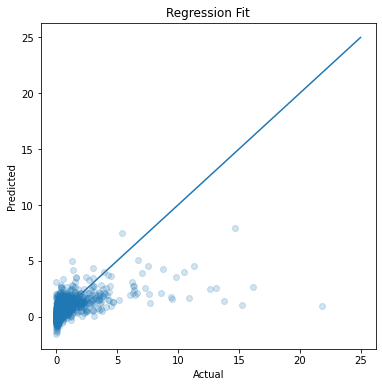

In [567]:
limx = [0, 25]
limy = [0, 25]

fig, ax = plt.subplots(figsize = (6, 6));
ax.plot(limx, limy);
ax.scatter(ytest, ypred, alpha = 0.2);
ax.set_title('Regression Fit')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

In [568]:
r2 = metrics.r2_score(ytest, ypred)
r2

0.2695968997845354